In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving NBA.csv to NBA.csv


In [ ]:
df = pd.read_csv('NBA.csv')

if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

df.drop_duplicates(inplace=True)

df.fillna(df.median(), inplace=True)

median_salary = df['Salary'].median()
df['High_Salary'] = (df['Salary'] > median_salary).astype(int)

selected_columns = ['Age', 'GP', 'GS', 'MP', 'FG', '3P', 'FT', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'High_Salary']
X = df[selected_columns].drop('High_Salary', axis=1)
y = df['High_Salary']

print(df.head())


         Player Name    Salary Position  Age     Team  GP  GS    MP    FG  \
0      Stephen Curry  48070014       PG   34      GSW  56  56  34.7  10.0   
1          John Wall  47345760       PG   32      LAC  34   3  22.2   4.1   
2  Russell Westbrook  47080179       PG   34  LAL/LAC  73  24  29.1   5.9   
3       LeBron James  44474988       PF   38      LAL  55  54  35.5  11.1   
4       Kevin Durant  44119845       PF   34  BRK/PHO  47  47  35.6  10.3   

    FGA  ...  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP  High_Salary  
0  20.2  ...  31.0  5.8  2.0  7.8  0.192   7.5   0.1  7.5   4.7            1  
1   9.9  ...  27.0 -0.4  0.7  0.3  0.020  -0.8  -0.4 -1.2   0.1            1  
2  13.6  ...  27.7 -0.6  2.6  1.9  0.044   0.3  -0.1  0.2   1.2            1  
3  22.2  ...  33.3  3.2  2.4  5.6  0.138   5.5   0.6  6.1   4.0            1  
4  18.3  ...  30.7  4.7  2.1  6.8  0.194   6.0   1.2  7.1   3.9            1  

[5 rows x 52 columns]


<ipython-input-18-10d7bf8c87b9>:8: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


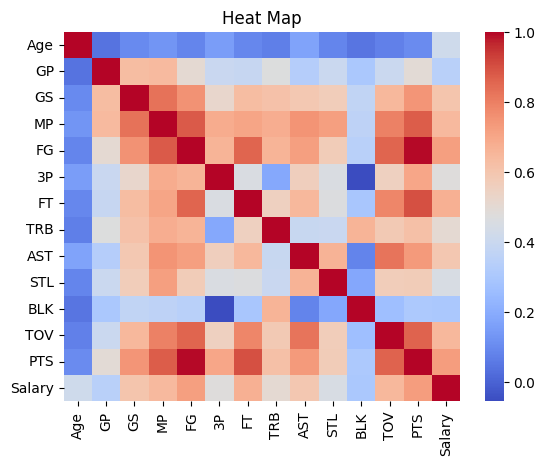

In [ ]:
selected_columns = ['Age', 'GP', 'GS', 'MP', 'FG', '3P', 'FT', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'Salary']
df = df[selected_columns]

corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Heat Map')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
print(classification_report(y_test, y_pred_logreg))

# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train_scaled, y_train)
y_pred_dtree = dtree.predict(X_test_scaled)
print(classification_report(y_test, y_pred_dtree))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        69
           1       0.86      0.82      0.84        72

    accuracy                           0.84       141
   macro avg       0.84      0.84      0.84       141
weighted avg       0.84      0.84      0.84       141

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        69
           1       0.76      0.76      0.76        72

    accuracy                           0.76       141
   macro avg       0.76      0.76      0.76       141
weighted avg       0.76      0.76      0.76       141

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        69
           1       0.82      0.86      0.84        72

    accuracy                           0.83       141
   macro avg       0.83      0.83      0.83       141
weighted avg       0.83      0.83      0.83       141



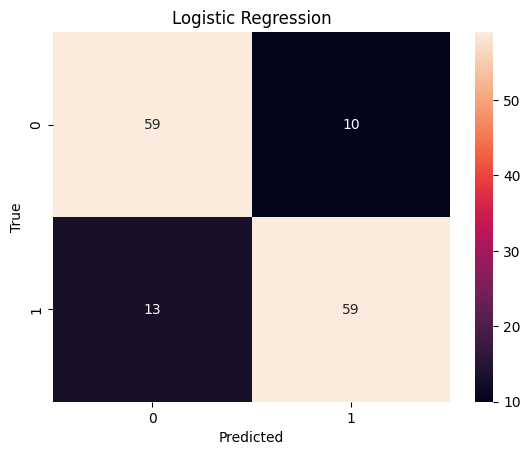

In [ ]:
#Logistic Regression
cm = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


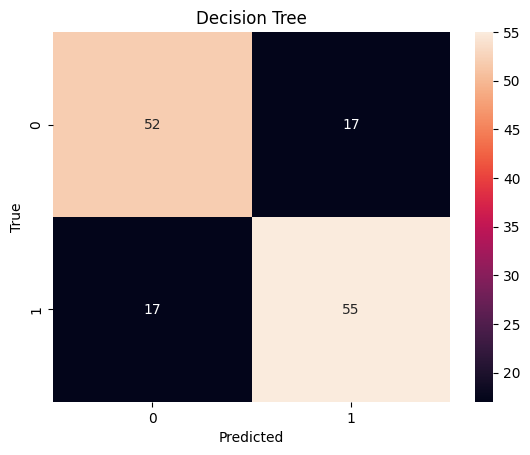

In [ ]:
#Decision Tree
cm = confusion_matrix(y_test, y_pred_dtree)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

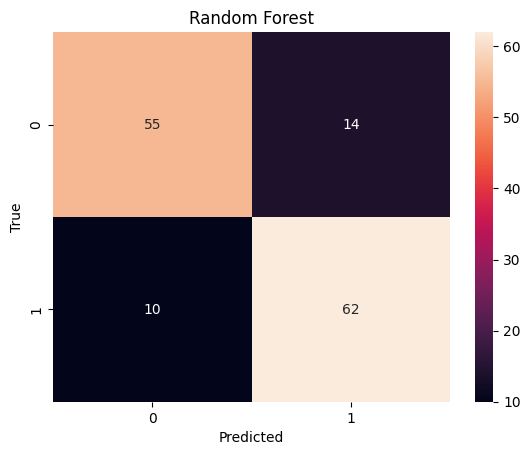

In [ ]:
#Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Logistic Regression
y_prob_logreg = logreg.predict_proba(X_test_scaled)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
auc_logreg = auc(fpr_logreg, tpr_logreg)

# Decision Tree
y_prob_dtree = dtree.predict_proba(X_test_scaled)[:, 1]
fpr_dtree, tpr_dtree, _ = roc_curve(y_test, y_prob_dtree)
auc_dtree = auc(fpr_dtree, tpr_dtree)

# Random Forest
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)


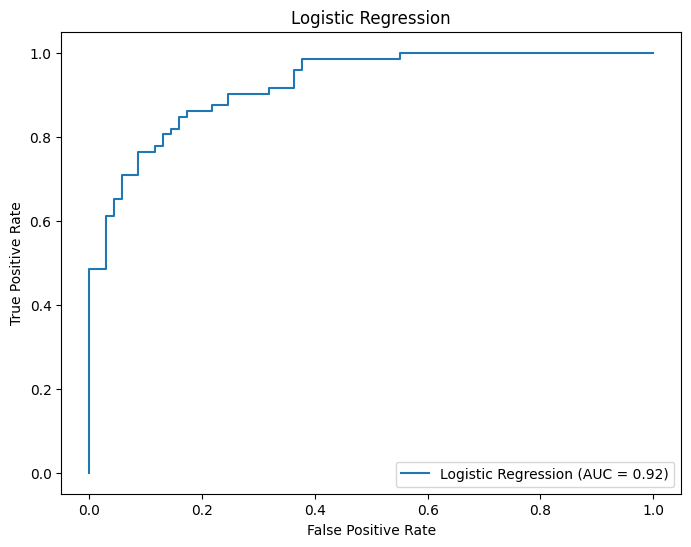

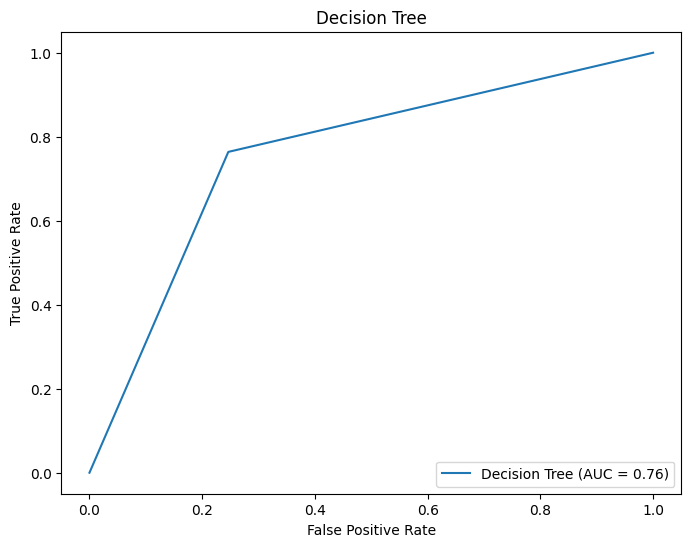

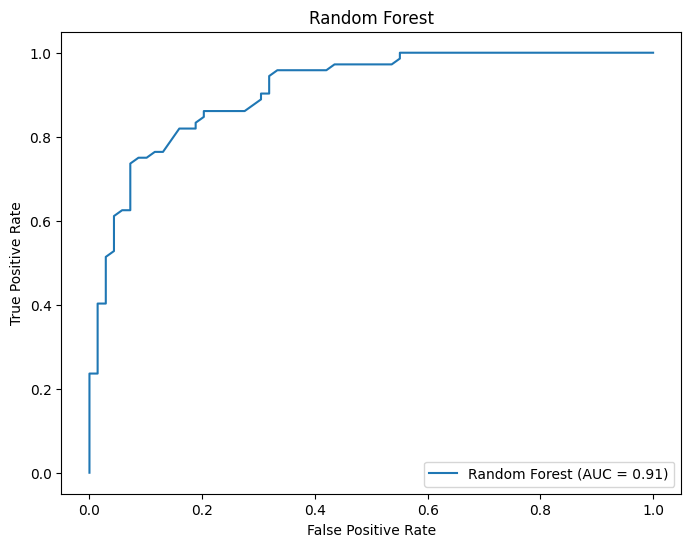

In [ ]:
# Logistic Regression ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.title('Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Decision Tree ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dtree, tpr_dtree, label=f'Decision Tree (AUC = {auc_dtree:.2f})')
plt.title('Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Random Forest ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.title('Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


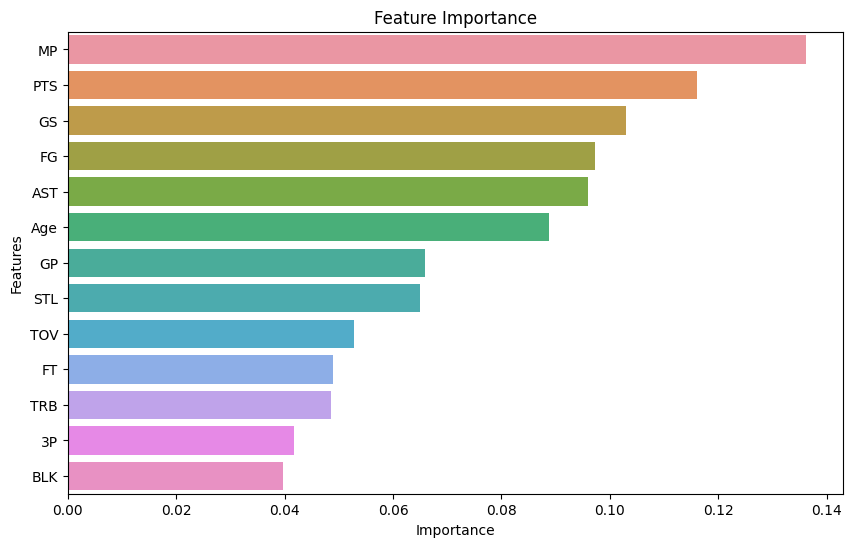

In [ ]:
feature_importances = rf.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
